# Regressão Linear: Custo Médico

A gestão da saúde pública enfrenta desafios na alocação de recursos devido à variabilidade nos custos médicos dos pacientes. Fatores como idade, hábitos de vida, condições preexistentes e tabagismo podem influenciar significativamente as despesas com atendimento médico. Para otimizar os investimentos em prevenção e tratamento, é fundamental entender quais características impactam mais os custos e como prever esses valores com precisão.

## Objetivo

A partir dos dados disponíveis, você deve desenvolver um modelo de Regressão Linear capaz de prever o custo médico esperado de um paciente com base em suas características individuais, como idade, IMC, tabagismo, nível de atividade física e uso de medicamentos. O modelo ajudará a identificar padrões de alto custo e poderá servir como base para políticas de prevenção e eficiência no sistema de saúde.

- **Realizar uma análise exploratória** para identificar padrões e possíveis correlações entre as variáveis.
- **Construir um modelo de regressão linear** para prever a quantidade de pacientes atendidos por mês.
- **Avaliar o desempenho do modelo**, interpretando seus coeficientes e verificando sua precisão.

## Dicionário de Variáveis

| Nome da Variável       | Descrição |
|------------------------|-----------|
| **idade**              | Idade do paciente em anos. |
| **IMC**                | Índice de Massa Corporal (IMC), métrica que relaciona peso e altura. |
| **filhos**             | Número de filhos ou dependentes do paciente. |
| **fumante_sim**        | Indica se o paciente é fumante (`1 = sim`, `0 = não`). |
| **regiao_noroeste**    | Indica se o paciente reside na região noroeste (`1 = sim`, `0 = não`). |
| **regiao_sudeste**     | Indica se o paciente reside na região sudeste (`1 = sim`, `0 = não`). |
| **regiao_sudoeste**    | Indica se o paciente reside na região sudoeste (`1 = sim`, `0 = não`). |
| **custos_medicos**     | Custo total das despesas médicas cobradas ao paciente. |
| **doencas_cronicas**   | Número de doenças crônicas diagnosticadas (ex.: hipertensão, diabetes). |
| **consultas_ano**      | Número de consultas médicas realizadas pelo paciente no último ano. |
| **atividade_fisica**   | Quantidade de dias por semana em que o paciente pratica atividades físicas. |
| **dieta_saudavel**     | Escala de 0 a 1 representando o nível de adesão a uma alimentação equilibrada. |
| **uso_medicamentos**   | Número de medicamentos contínuos utilizados pelo paciente. |

## Configurações Iniciais

In [ ]:
#Carregar as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Vamos analisar o dataset para entender sua estrutura, verificar a distribuição das variáveis e identificar possíveis problemas, como correlações inadequadas ou necessidade de pré-processamento.

In [ ]:
# Carregar base de dados e verificar informações da base
dados = pd.read_csv('/content/custo_medico.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             2772 non-null   int64  
 1   sexo              2772 non-null   object 
 2   IMC               2772 non-null   float64
 3   filhos            2772 non-null   int64  
 4   fumante           2772 non-null   object 
 5   regiao            2772 non-null   object 
 6   custos_medicos    2772 non-null   float64
 7   doencas_cronicas  2772 non-null   int64  
 8   consultas_ano     2772 non-null   int64  
 9   atividade_fisica  2772 non-null   int64  
 10  dieta_saudavel    2772 non-null   float64
 11  uso_medicamentos  2772 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 260.0+ KB


## Análise Inicial

- O dataset possui 2.772 registros e 12 colunas.
- Não há valores ausentes, o que elimina a necessidade de tratamento de dados faltantes.
- Existem 3 colunas categóricas (`sexo`, `fumante`, `regiao`) que precisarão ser transformadas para uso no modelo.
- A variável **custos_medicos** (variável-alvo) tem uma média de 13.261, mas um máximo de 63.770, o que indica possível distribuição assimétrica.
- Algumas variáveis numéricas podem precisar de normalização, como IMC e custos médicos, para evitar que valores muito altos dominem a regressão.

In [ ]:
dados.describe()

,idade,IMC,filhos,custos_medicos,doencas_cronicas,consultas_ano,atividade_fisica,dieta_saudavel,uso_medicamentos
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959,0.788961,3.465729,3.557720,0.497944,1.498918
std,14.081459,6.129449,1.214806,12151.768945,0.893770,1.974736,2.271516,0.198439,1.036504
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.797000,0.000000,2.000000,2.000000,0.361441,1.000000
50%,39.000000,30.447500,1.000000,9333.014350,1.000000,3.000000,4.000000,0.496439,1.000000
75%,51.000000,34.770000,2.000000,16577.779500,1.000000,5.000000,6.000000,0.631922,2.000000
max,64.000000,53.130000,5.000000,63770.428010,5.000000,10.000000,7.000000,1.000000,5.000000


## Visualização

### Distribuição dos Custos Médicos

- A distribuição é **assimétrica à direita**, ou seja, há alguns pacientes com custos médicos muito altos.
- Isso pode indicar que o modelo de regressão pode ser influenciado por esses valores extremos.


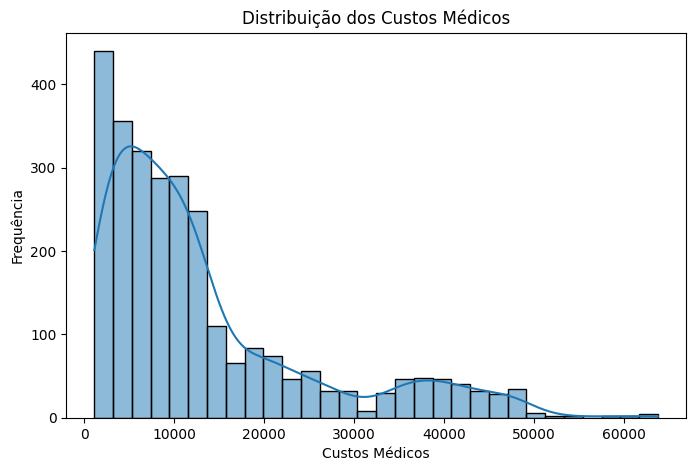

In [ ]:
# Distribuição dos custos médicos
plt.figure(figsize=(8, 5))
sns.histplot(dados['custos_medicos'], bins=30, kde=True)
plt.title("Distribuição dos Custos Médicos")
plt.xlabel("Custos Médicos")
plt.ylabel("Frequência")
plt.show()

### Matriz de Correlação

- **Idade** e **doenças crônicas** apresentam correlação moderada com os **custos médicos**.
- **Fumante** pode ser um fator crítico, mas está ausente da matriz porque ainda está como variável categórica.
- **Atividade física** e **dieta saudável** apresentam correlação negativa fraca, o que faz sentido: hábitos mais saudáveis podem reduzir os custos médicos.

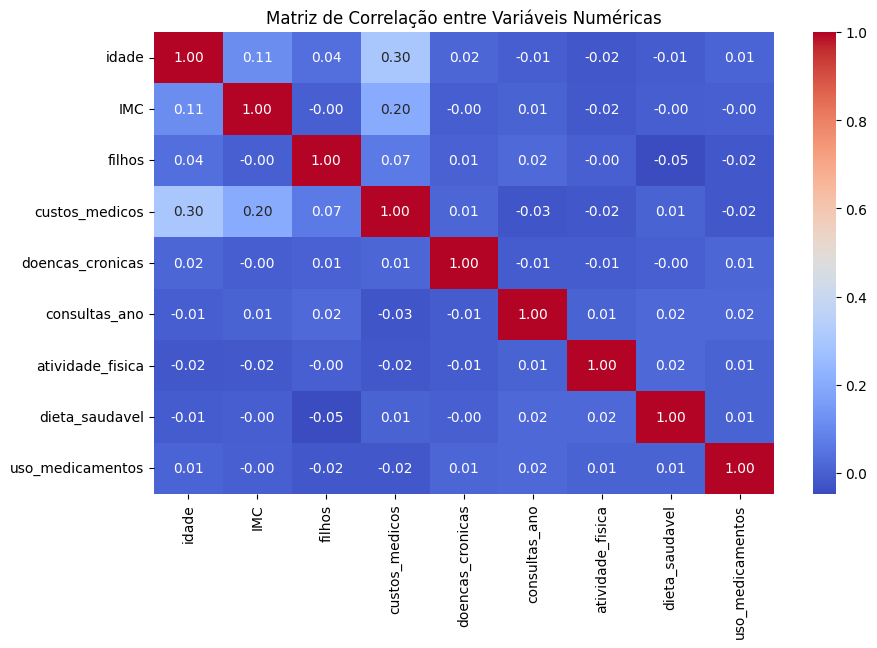

In [ ]:
# Matriz de correlação para variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(dados.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

### Transformação das Variáveis Categóricas

Vamos converter as variáveis categóricas (`sexo`, `fumante`, `regiao`) para um formato numérico, pois modelos de regressão linear não trabalham diretamente com dados categóricos.

As variáveis categóricas serão convertidas em formato numérico:

- `sexo_masculino`: 1 para masculino, 0 para feminino.
- `fumante_sim`: 1 para fumante, 0 para não fumante.
- `regiao_*`: Dummies para as regiões (Nordeste será removido como referência).

In [ ]:
# Aplicar One-Hot Encoding nas variáveis categóricas
dados_encoded = pd.get_dummies(dados, columns=['sexo', 'fumante', 'regiao'], drop_first=True,dtype='int')

dados_encoded.head()

,idade,IMC,filhos,custos_medicos,doencas_cronicas,consultas_ano,atividade_fisica,dieta_saudavel,uso_medicamentos,sexo_masculino,fumante_sim,regiao_noroeste,regiao_sudeste,regiao_sudoeste
0,19,27.900,0,16884.92400,0,4,6,0.390154,2,0,1,0,0,1
1,18,33.770,1,1725.55230,2,7,3,0.332918,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,2,4,0.155488,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,2,2,0.524512,4,1,0,1,0,0
4,32,28.880,0,3866.85520,0,3,3,0.590419,1,1,0,1,0,0
